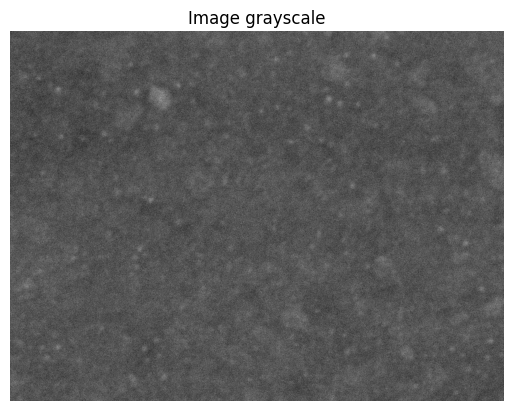

c:\Users\Sergey\Work\grain-processor\grain_processor\grain_processor.py:213: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_scaled, "r-", lw=2, color="lightcoral")


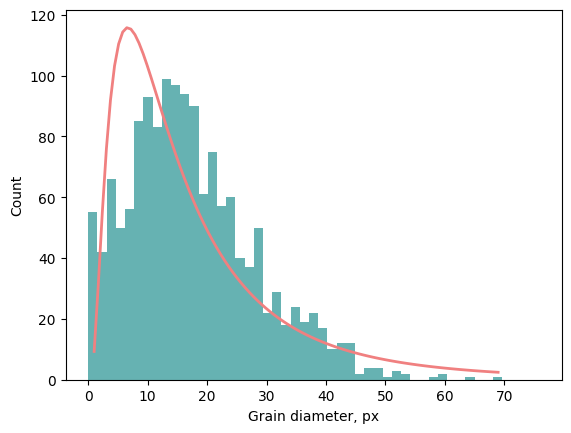

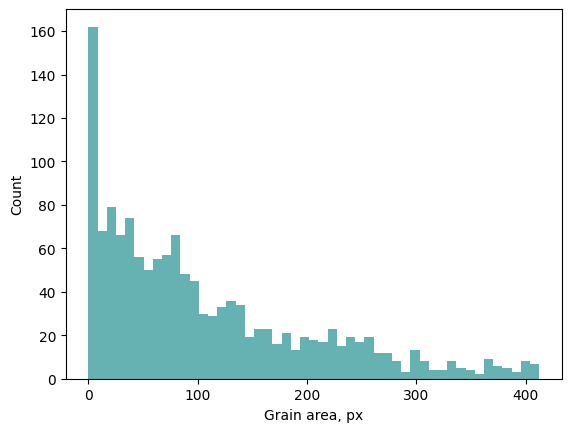

array([120.,  11., 227., ..., 109.,  11.,  40.])

In [2]:
from grain_processor import GrainProcessor
from skimage.measure import regionprops
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

GP = GrainProcessor(
    r"C:\Users\Sergey\Work\grain-processor\image_to_process\sample 2\contrasted.tif",
    # fft_filter=True,
)
GP.image_grayscale(plot=True)
GP.get_diameters(plot=True, fit=True)
GP.get_areas(plot=True, fit=False)


In [ ]:
# GP._threshold(plot=True)
# GP._opening(plot=True)
# GP._background(plot=True)
# GP._foreground(plot=True)
# GP._unknown_region(plot=True)
# GP._markers(plot=True)
# GP._image_non_contrast(plot=True)

In [11]:
image = GP._image(plot=False, grayscale=True)
fft = cv.dft(np.float32(image), flags=cv.DFT_COMPLEX_OUTPUT)
dft_sft = np.fft.fftshift(fft)
magnitude_spectrum = 20 * np.log(cv.magnitude(dft_sft[:, :, 0], dft_sft[:, :, 1]))

: 

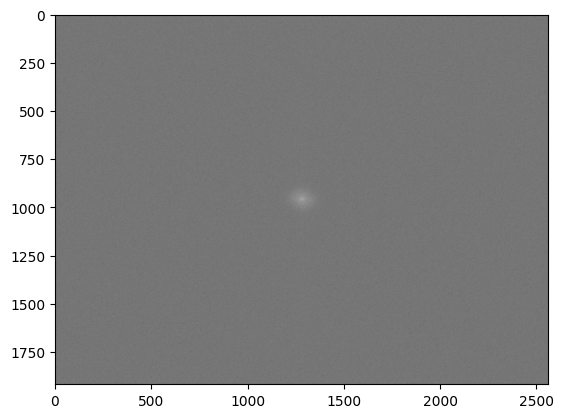

: 

In [12]:
plt.imshow(magnitude_spectrum, cmap="gray")

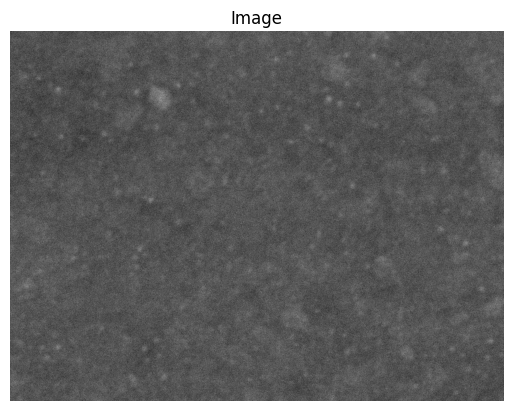

: 

In [13]:
GP._image(plot=True, grayscale=True);

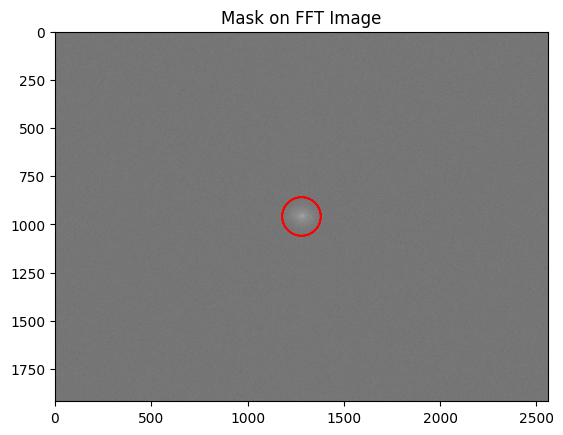

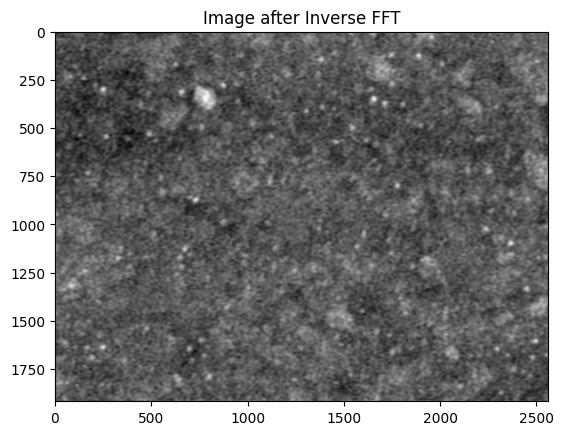

: 

In [14]:
def apply_fft_and_mask(image, r=100, plot_mask=False):
    # Apply FFT
    fft = cv.dft(np.float32(image), flags=cv.DFT_COMPLEX_OUTPUT)
    dft_shifted = np.fft.fftshift(fft)

    # Create a mask
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols, 2), np.uint8)
    center = [crow, ccol]
    x, y = np.ogrid[:rows, :cols]
    mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r**2
    mask[mask_area] = 1
    if plot_mask:
        plt.figure()
        plt.imshow(
            20 * np.log(cv.magnitude(dft_shifted[:, :, 0], dft_shifted[:, :, 1])),
            cmap="gray",
        )
        plt.contour(mask[:, :, 0], colors="r", linewidths=1)
        plt.title("Mask on FFT Image")
        plt.show()

    # Apply mask and inverse FFT
    fshift = dft_shifted * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv.idft(f_ishift)
    img_back = cv.magnitude(img_back[:, :, 0], img_back[:, :, 1])

    plt.figure()
    plt.imshow(img_back, cmap="gray")
    plt.title("Image after Inverse FFT")
    plt.axis("off")
    plt.show()

    return img_back


# Example usage
img_back = apply_fft_and_mask(image, r=100, plot_mask=True)


(0.0, 1.0, 0.0, 1.0)

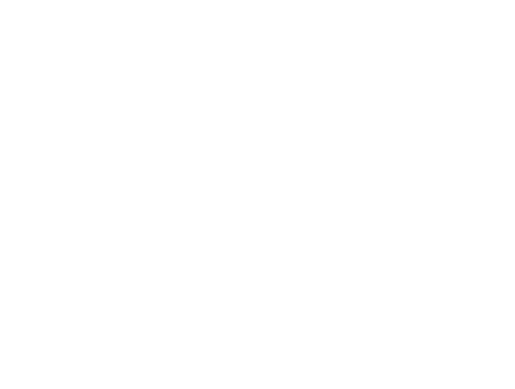

: 

In [16]:
plt.rcParams["axes.axisbelow"] = True
plt.rcParams["axes.grid"] = False
plt.rcParams["axes.spines.left"] = False
plt.rcParams["axes.spines.bottom"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["xtick.bottom"] = False
plt.rcParams["ytick.left"] = False
plt.rcParams["xtick.labelbottom"] = False
// plt.axis('off')


interactive(children=(FloatSlider(value=1.0, description='A', max=4.0, min=-4.0), FloatSlider(value=0.0, descr…

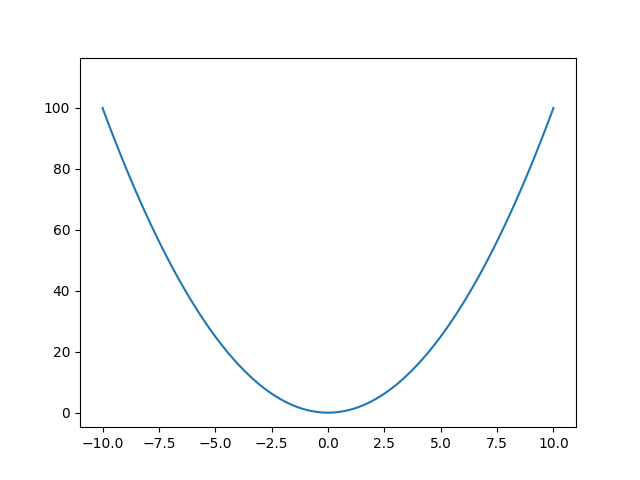

: 

In [6]:
%matplotlib ipympl

from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)


def f(x, A, B, C):
    return A * x**2 + B * x + C


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
(line,) = ax.plot(x, f(x, A=1, B=1, C=1))


def update(A=1, B=0, C=0):
    line.set_ydata(f(x, A, B, C))
    fig.canvas.draw_idle()


interact(update, A=(-4, 4, 0.1), B=(-4, 4, 0.1), C=(-4, 4, 0.1));